Author: [Ahmed Yousri Sobhi](ahmedyousrisobhi@gmail.com)

Created_at: 2023-09-04

Objective: Raw data explorating analysis.

Abstract:
- Just before jumping into data cleaning and preprocessing, it's recommended to get familiar with our dataset first, and get a gentle introduction with it.
- Exploring each feature individually (uni-varient) will help us determine the preprocessing step required for that feature.

# Importing Required Libararies and Packages

In [5]:
import warnings
warnings.filterwarnings('ignore')
import os

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

# To display all the columns
pd.set_option('display.max_columns', None)

sns.set()
sns.set_style('whitegrid')

# dataprep for data report exploration
from dataprep.eda import create_report

# Required Functions

In [14]:
def plot_data_frequency(_df: pd.DataFrame, target_col: str, top_index=20, save_plot=True) -> None:
    """
        Used to plot bar plot of top n values in selected target col.
        
        PARAMETERS
            _df: pandas DataFrame, input dataset.
            target_col: str, input target col to plot its unique values count.
            top_index: int, top n index value to plot in the plotting.
            save_plot: boolean, determine whether to save the plot of not.
        
        RETURN
            None
    """
    
    # Setup the figure size
    plt.figure(figsize=(8, 6))

    percentage_counts = (
        _df[target_col]
        .value_counts(normalize=True)
        .rename('percentage')
        .mul(100)
        .reset_index()
        .rename(columns={'index':target_col})
        .sort_values('percentage', ascending=False)
        .iloc[:top_index]
    )

    # seaborn barplot
    sns.barplot(data=percentage_counts, x='percentage', y=target_col)

    # Rotate the x-axis labels
    plt.yticks(rotation=0)

    # Set the titel of the plot.
    plt.title(f'What is the most common used {target_col}?')

    # Save the plot
    if save_plot == True:
        try:
            plt.savefig(f'../report/plots/{target_col}_countplot.jpg', bbox_inches = 'tight')
        except FileNotFoundError:
            print('Wring file or file path')
            print('Creating new directory')
            # Create required directories
            if not os.path.exists('../report/plots'):
                os.makedirs('../report/plots/')
            plt.savefig(f'../report/plots/{target_col}_countplot.jpg', bbox_inches = 'tight')

    # Show the plot
    plt.show()


def plot_numeric_features(df:pd.DataFrame, cols_to_drop:list, plot_type, save_plot:bool) -> None:
    """
        Used to plot numerical featuers based on input selected plot.

        PARAMETERS
            df: pandas DataFrame, input dataframe.
            cols_to_drop: list, list of columns to drop.
            plot_type: function, define the plot type.
            save_plot: boolean, to whether save plot or not.
        
        RETURN
            None
    """

    # Select Numerical columns only
    features_numeric = (
        df.drop(cols_to_drop, axis=1)
        .select_dtypes('number')
        .columns.tolist()
    )

    # Calculate the number of rows and columns for subplots
    num_rows = int(len(features_numeric) / 2) + len(features_numeric) % 2
    num_cols = 2

    # Create subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8+num_rows*2 + 1))

    # Iterate over features and plot distplot on subplots
    for i, feature in enumerate(features_numeric):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        plot_type(df[feature], ax=ax)
        ax.set_title(f'{plot_type.__name__} of {feature.capitalize()}')

    # Remove empty subplots if necessary
    if len(features_numeric) % 2 != 0:
        fig.delaxes(axes[num_rows - 1, num_cols - 1])

    # Set title for the whole plot
    fig.suptitle(f'{plot_type.__name__} Analysis', fontsize=16)
    plt.tight_layout()

    # Save the plot
    if save_plot == True:
        try:
            plt.savefig(f'../report/plots/numerical_{plot_type.__name__}.jpg',bbox_inches = 'tight')
        except FileNotFoundError:
            print('Wring file or file path')
            print('Creating new directory')
            # Create required directories
            if not os.path.exists('../report/plots'):
                os.makedirs('../report/plots/')
            plt.savefig(f'../report/plots/numerical_{plot_type.__name__}.jpg',bbox_inches = 'tight')
        
    plt.show()

# Loading Dataset

In [2]:
# loading csv file
df = (
    pd.read_csv('../data/raw/marketing_campaign.csv', sep='\t')
    .assign(
        Dt_Customer= lambda x:pd.to_datetime(x.Dt_Customer, format='%d-%m-%Y')
    )
)
# display head of the dataset
display(df.head(5))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
# display dataframe into
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [4]:
# Creating an analysis report regarding the dataset
report = create_report(df)
# Store the report in html format
try:
    report.save('../report/reports/raw_data_report')
except FileNotFoundError:
    print('Wring file or file path')
    print('Creating new directory')
    # Create required directories
    if not os.path.exists('../report/reports'):
        os.makedirs('../report/reports/')
    report.save('../report/reports/raw_data_report')

  0%|          | 0/4277 [00:00<?, ?it/s]

Report has been saved to ../report/reports/raw_data_report.html!


Some insights based on the report:
- Tiny percent of missing cells in the dataset, all located in feature 'Income'.
- There are no duplicated rows.
- Data types included are [Numerical:15, Categorical:13, DateTime:1].
- Features [MntFruits, MntSweetProducts] have similar distribution.
- Many features are skewed.
- Features like [MntFruits, MntFishProducts, MntSweetProducts, NumCatalogPurchases] have high percentage of zeros.

# Statistical Analysis

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


Insights:
- Outliers in feature 'Year_Birth', as the mean is around the [25th : Max] quantiles.
- Most of features [AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Complain, Response] have more than 75% are zeros.
- Constant value in feature 'Z_CostContact'.

# Uni-Varient Analysis
## Numerical Features

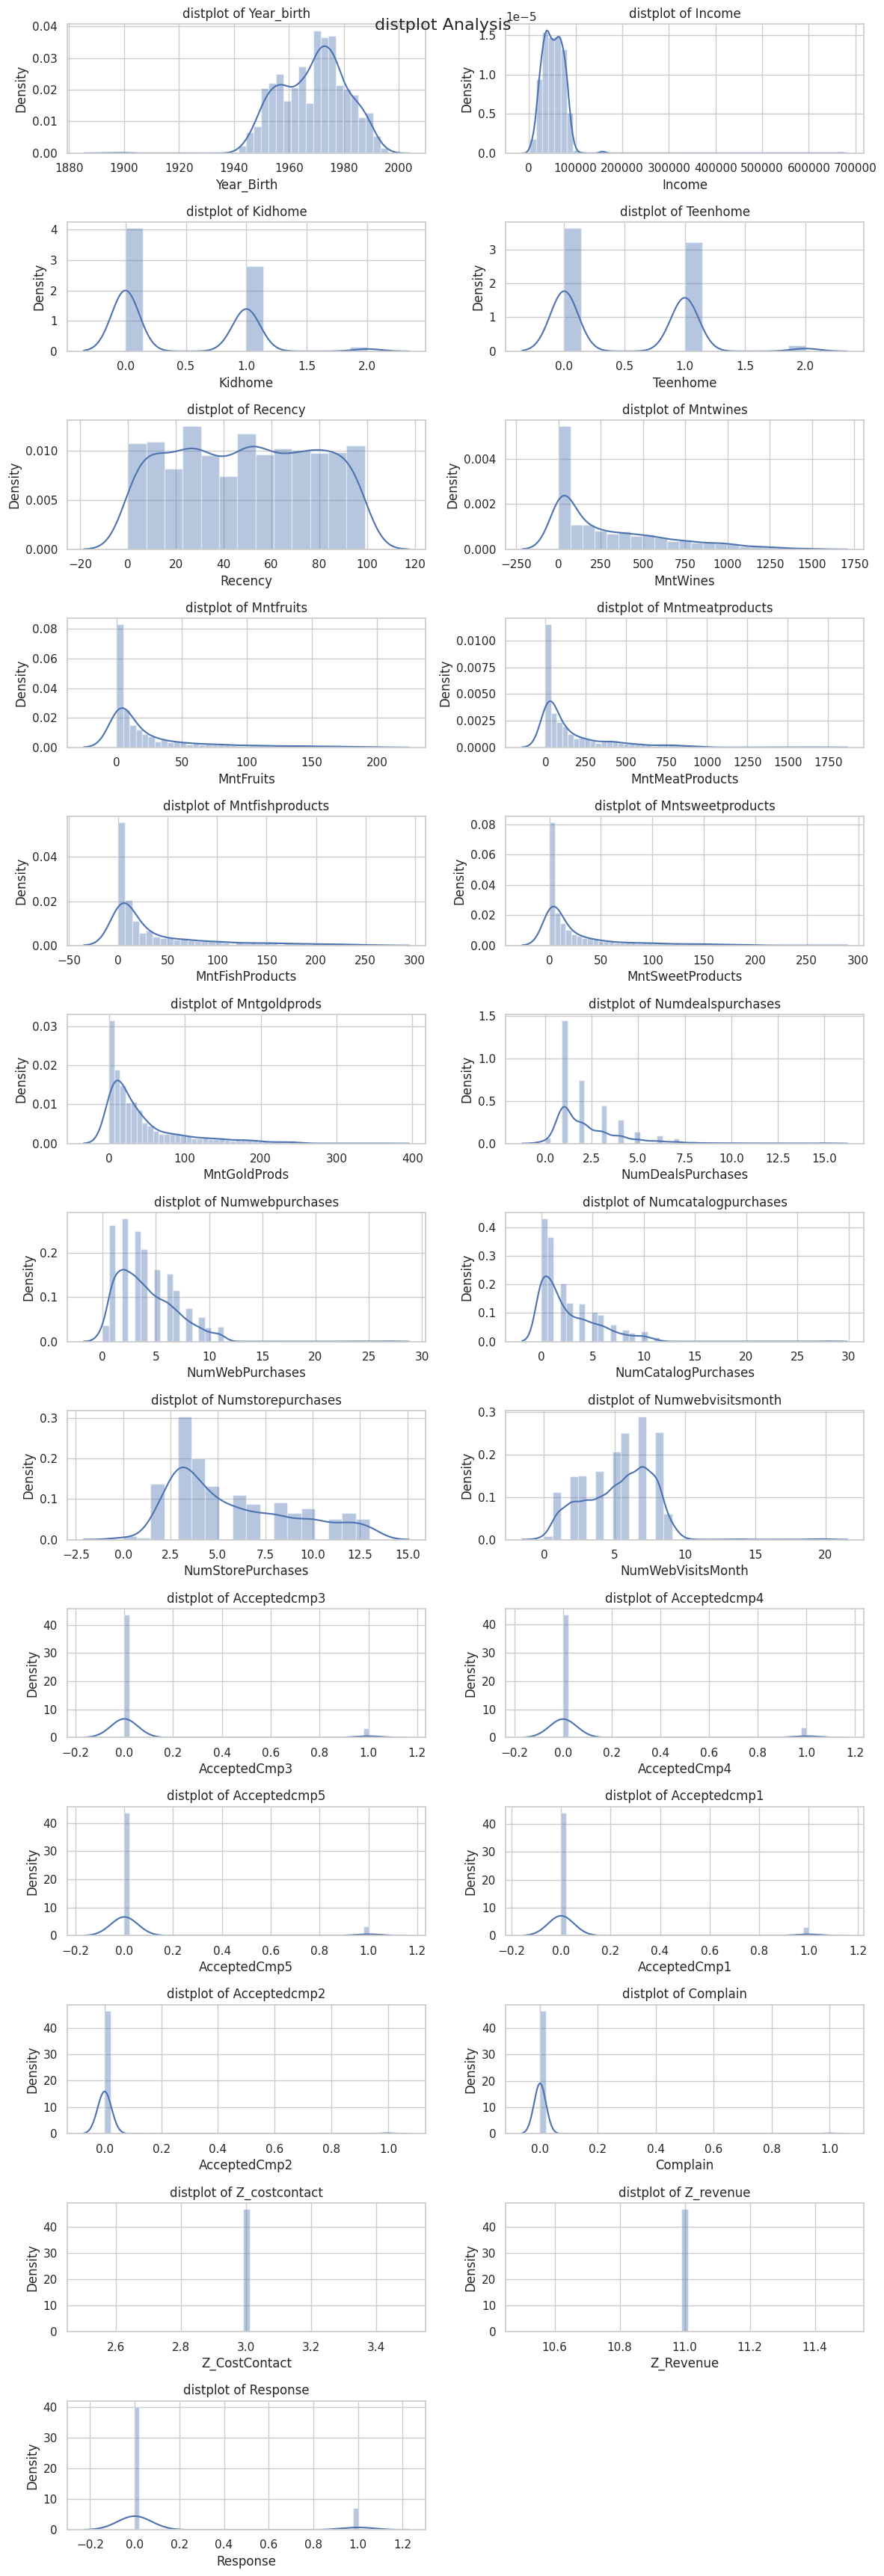

In [15]:
# Used to look at the distribution of a numerical variables
cols_to_drop = ['ID']
plot_numeric_features(df, cols_to_drop, sns.distplot, save_plot=True)

Insights:

### Plotting Data Frequency
- Top 20 distinct values

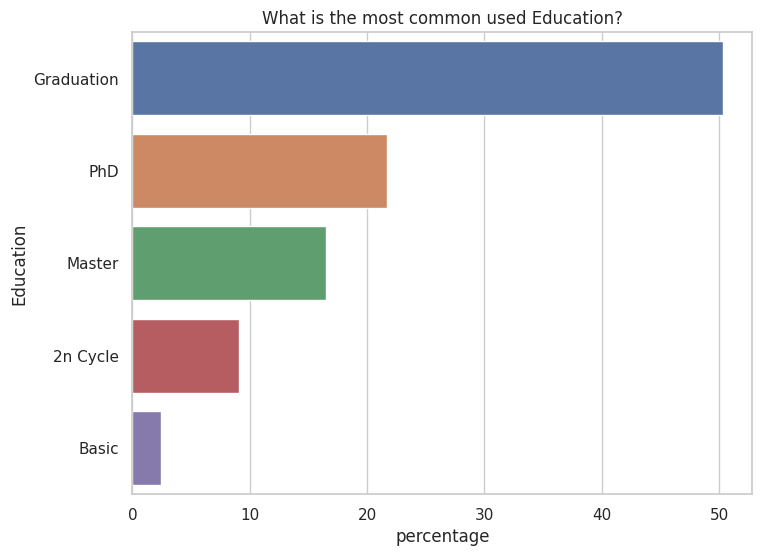

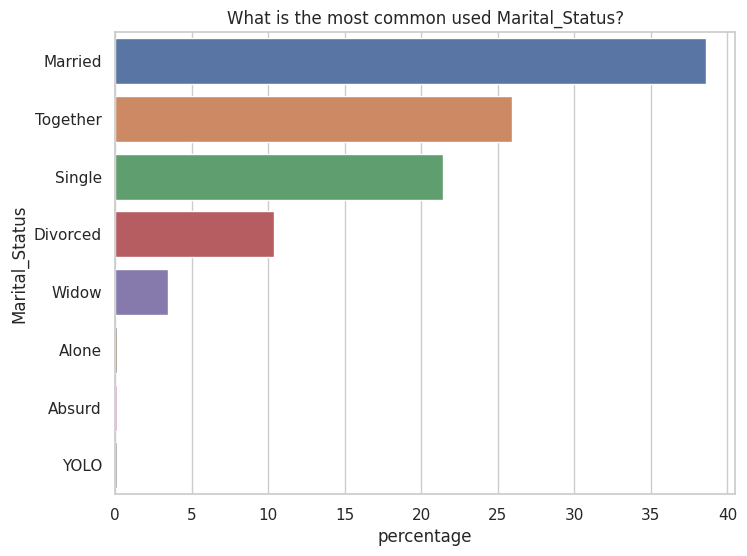

In [17]:
category_cols = df.select_dtypes('object').columns

for col in category_cols:
    plot_data_frequency(df, col, 20, save_plot=True)